In [2]:
%matplotlib inline

import matplotlib.pyplot as pl
import numpy as np
import math

In [3]:
#### Dynamic Response of a FP Cavity 
c = 3.0e8
def Delta_L(freq, r_a, r_b, L):
    T = L/c
    tf = (1.-r_a*r_b) / ( 1.-r_a*r_b*np.exp(-2*1j*freq*T) )
    return tf

def Delta_F(freq, r_a, r_b, L):
    T = L/c
    tf = (  (1.-np.exp(-2*1j*freq*T)) * (1.-r_a*r_b)  ) / (2.*1j*freq*T * (1.-r_a*r_b*np.exp(-2.*1j*freq*T)) )
    return tf


In [4]:
x = np.linspace(1,1e6,1000000)

In [5]:
T_a = 0.0148
r_a = np.sqrt(1-T_a)

T_b = 1.4e-6
r_b = np.sqrt(1-T_b)
L = 4000.

resp_L = Delta_L(x,r_a,r_b,L)
resp_F = Delta_F(x,r_a,r_b,L)

In [6]:
mag_L = np.absolute(resp_L) 
phs_L = np.angle(resp_L)

mag_F = np.absolute(resp_F) 
phs_F = np.angle(resp_F)

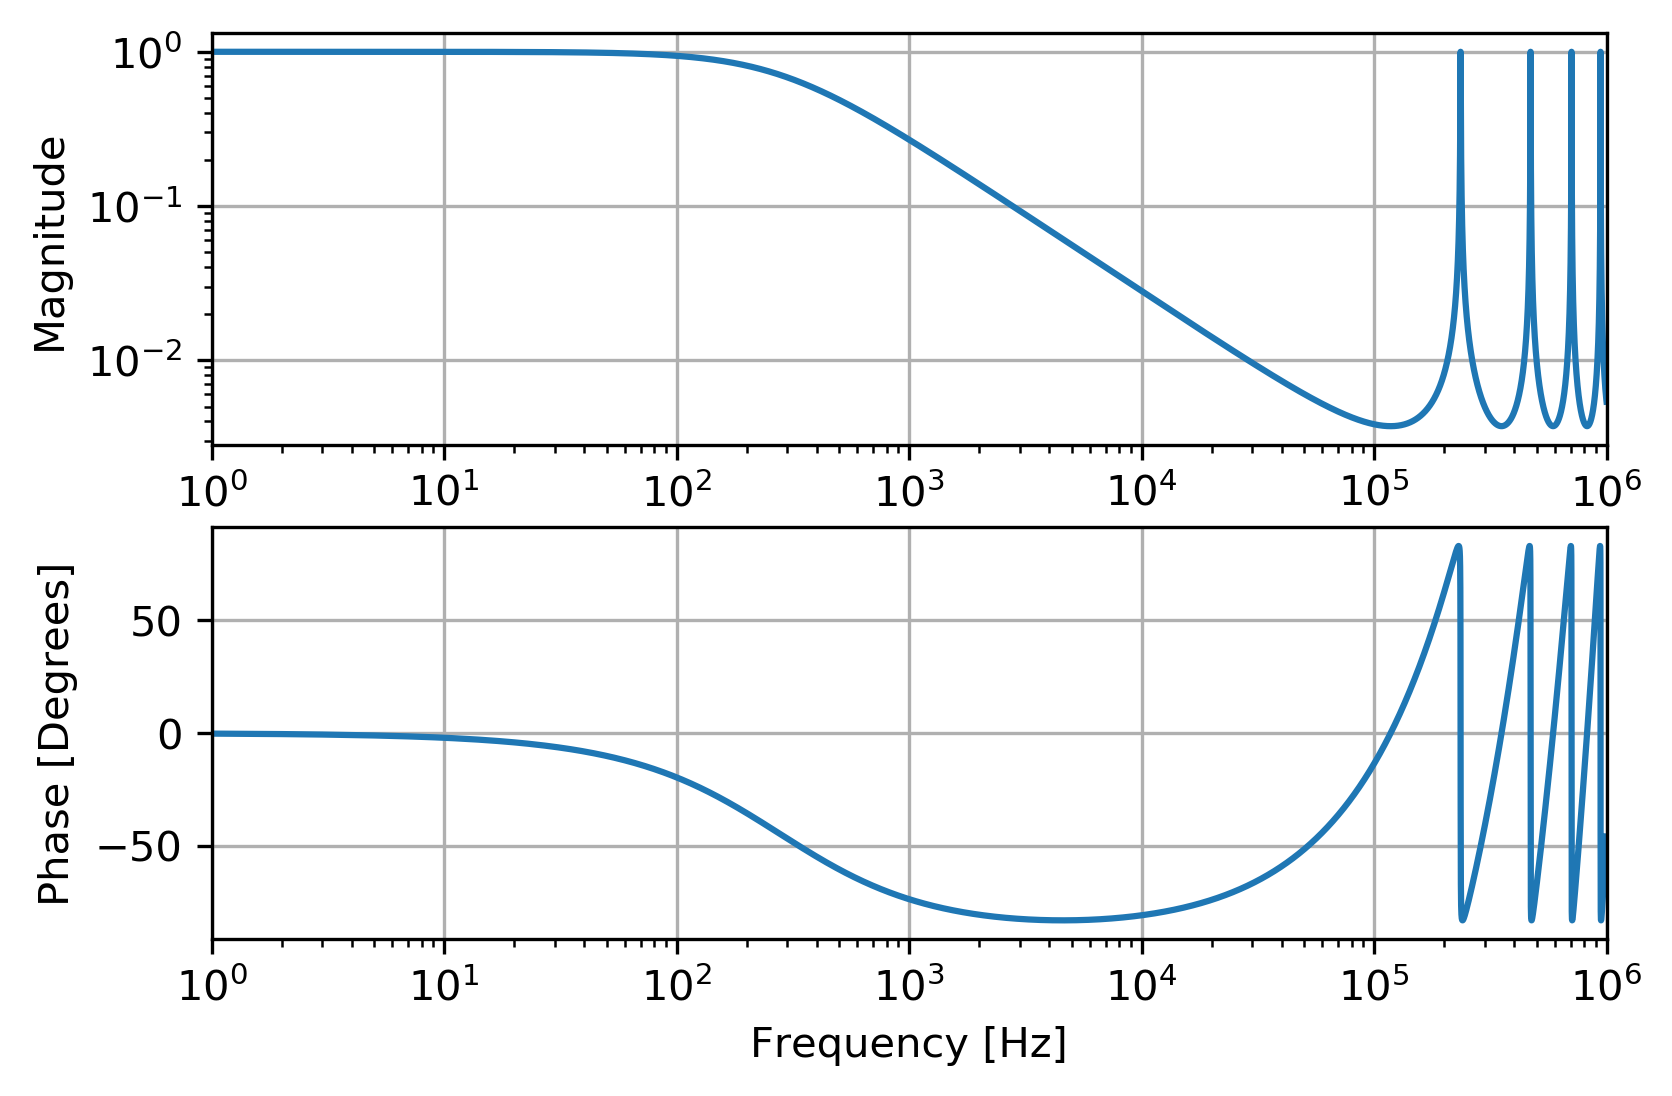

In [7]:
fig = pl.figure(dpi=300)
pl.subplot(2,1,1)
pl.loglog(x,mag_L)
pl.grid()
pl.xlim(x.min(),x.max())
pl.ylabel('Magnitude')

pl.subplot(2,1,2)
pl.semilogx(x,phs_L*180.0/np.pi)
pl.grid()
pl.xlim(x.min(),x.max())
pl.ylabel('Phase [Degrees]')

pl.xlabel('Frequency [Hz]')

pl.savefig('../../Figures/FP_L_TF.png',bbox_inches='tight')

pl.show()

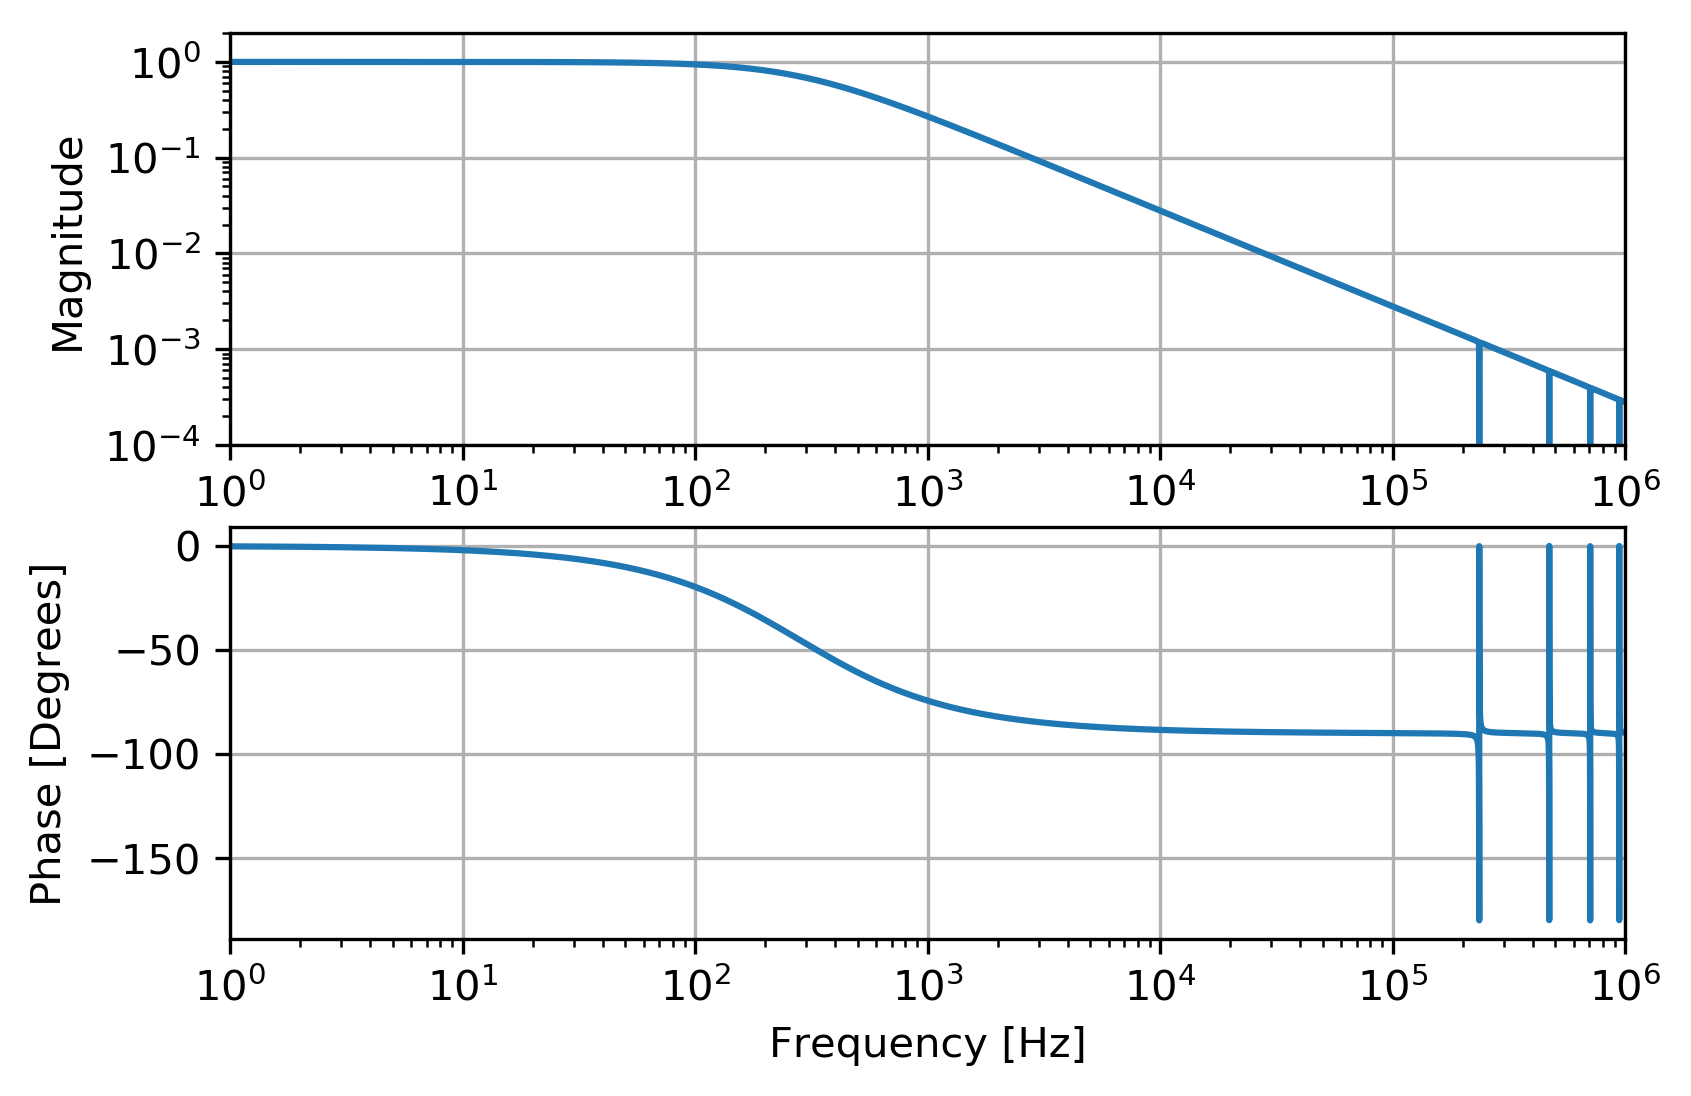

In [8]:
fig = pl.figure(dpi=300)
pl.subplot(2,1,1)
pl.loglog(x,mag_F)
pl.grid()
pl.ylim(1e-4,2)
pl.xlim(x.min(),x.max())
pl.ylabel('Magnitude')

pl.subplot(2,1,2)
pl.semilogx(x,phs_F*180.0/np.pi)
pl.grid()
pl.xlabel('Frequency [Hz]')
pl.ylabel('Phase [Degrees]')

pl.xlim(x.min(),x.max())

pl.savefig('../../Figures/FP_F_TF.png',bbox_inches='tight')
pl.show()

In [9]:
### Finesse Simulation portion
import pykat
import pylab as pl
import numpy as np

kat_code = '''
l laser 1 0 nin                     % Laser P=50W f_offset=0Hz
mod EOM 15M 0.001 1 pm nin n0       % Phase modulator f_mod=15MHz, modulation index=0.001

s s0 0 n0 n1
bs pickoff 0 1 0 45 n1 dump n2 n3    % Beam splitter with R=0.1, T=0.9 at zero tuning
s s1 0.1 n2 n4                       % Space 10cm length

m1 ITM 0.0148 0.0 0 n4 n5       % Cavity input mirror with R=0.99, T=0.01, at zero tuning
s scavity 2999.5 n5 n6              % Space 1m length
m1 ETM 1.4u 0.0 0 n6 n7           % Cavity end mirror with R=0.99, T=0.01, at zero tuning

pd1 PDH 15M 0 n4                        % Photodetector with demodulation at 15MHz, demodulation phase 0
pd1 PDHtran 15M 0 n7
pd PDrefl n4
pd PDtran n7                      
pd PDcirc n6

xaxis ETM phi lin -20 20 1001
'''
### Find the gaussian beam parameter at the first optic
basekat = pykat.finesse.kat() 
basekat.parse(kat_code)
kat=basekat.deepcopy() #copy kat code
kat.verbose = False

out = kat.run()

freq = (3e8/(4*np.pi*kat.scavity.L) * out.x)/1e6

C:\Users\tvo88\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


                                              ..-
    PyKat 1.1.277         _                  '(
                          \`.|\.__...-""""-_." )
       ..+-----.._        /  ' `            .-'
   . '            `:      7/* _/._\    \   (
  (        '::;;+;;:      `-"' =" /,`"" `) /
  L.        \`:::a:f            c_/     n_'
  ..`--...___`.  .    ,
   `^-....____:   +.      www.gwoptics.org/pykat



In [15]:
res = 300

def plot_fig_pwr(ydata,title,file):
    pl.figure(figsize=(9,4),dpi=res)

    pl.subplot(111)
    pl.plot(freq, ydata, linewidth=4)
    #pl.legend(fontsize=15)

    pl.xlabel("Offset from Resonance [MHz]",fontsize=18)
    pl.ylabel("Power [W]",fontsize=18)
    
    #pl.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    
    #pl.title(str(title))
    ###Main plot formatting
    pl.tick_params(labelsize=12)
    pl.tick_params(which='both', width=1)
    pl.tick_params(which='major', length=2)
    pl.tick_params(which='minor', length=2)
    pl.grid(True, zorder=-1)
    
    pl.savefig('../../Figures/'+file+'.png',bbox_inches='tight')
    pl.show()

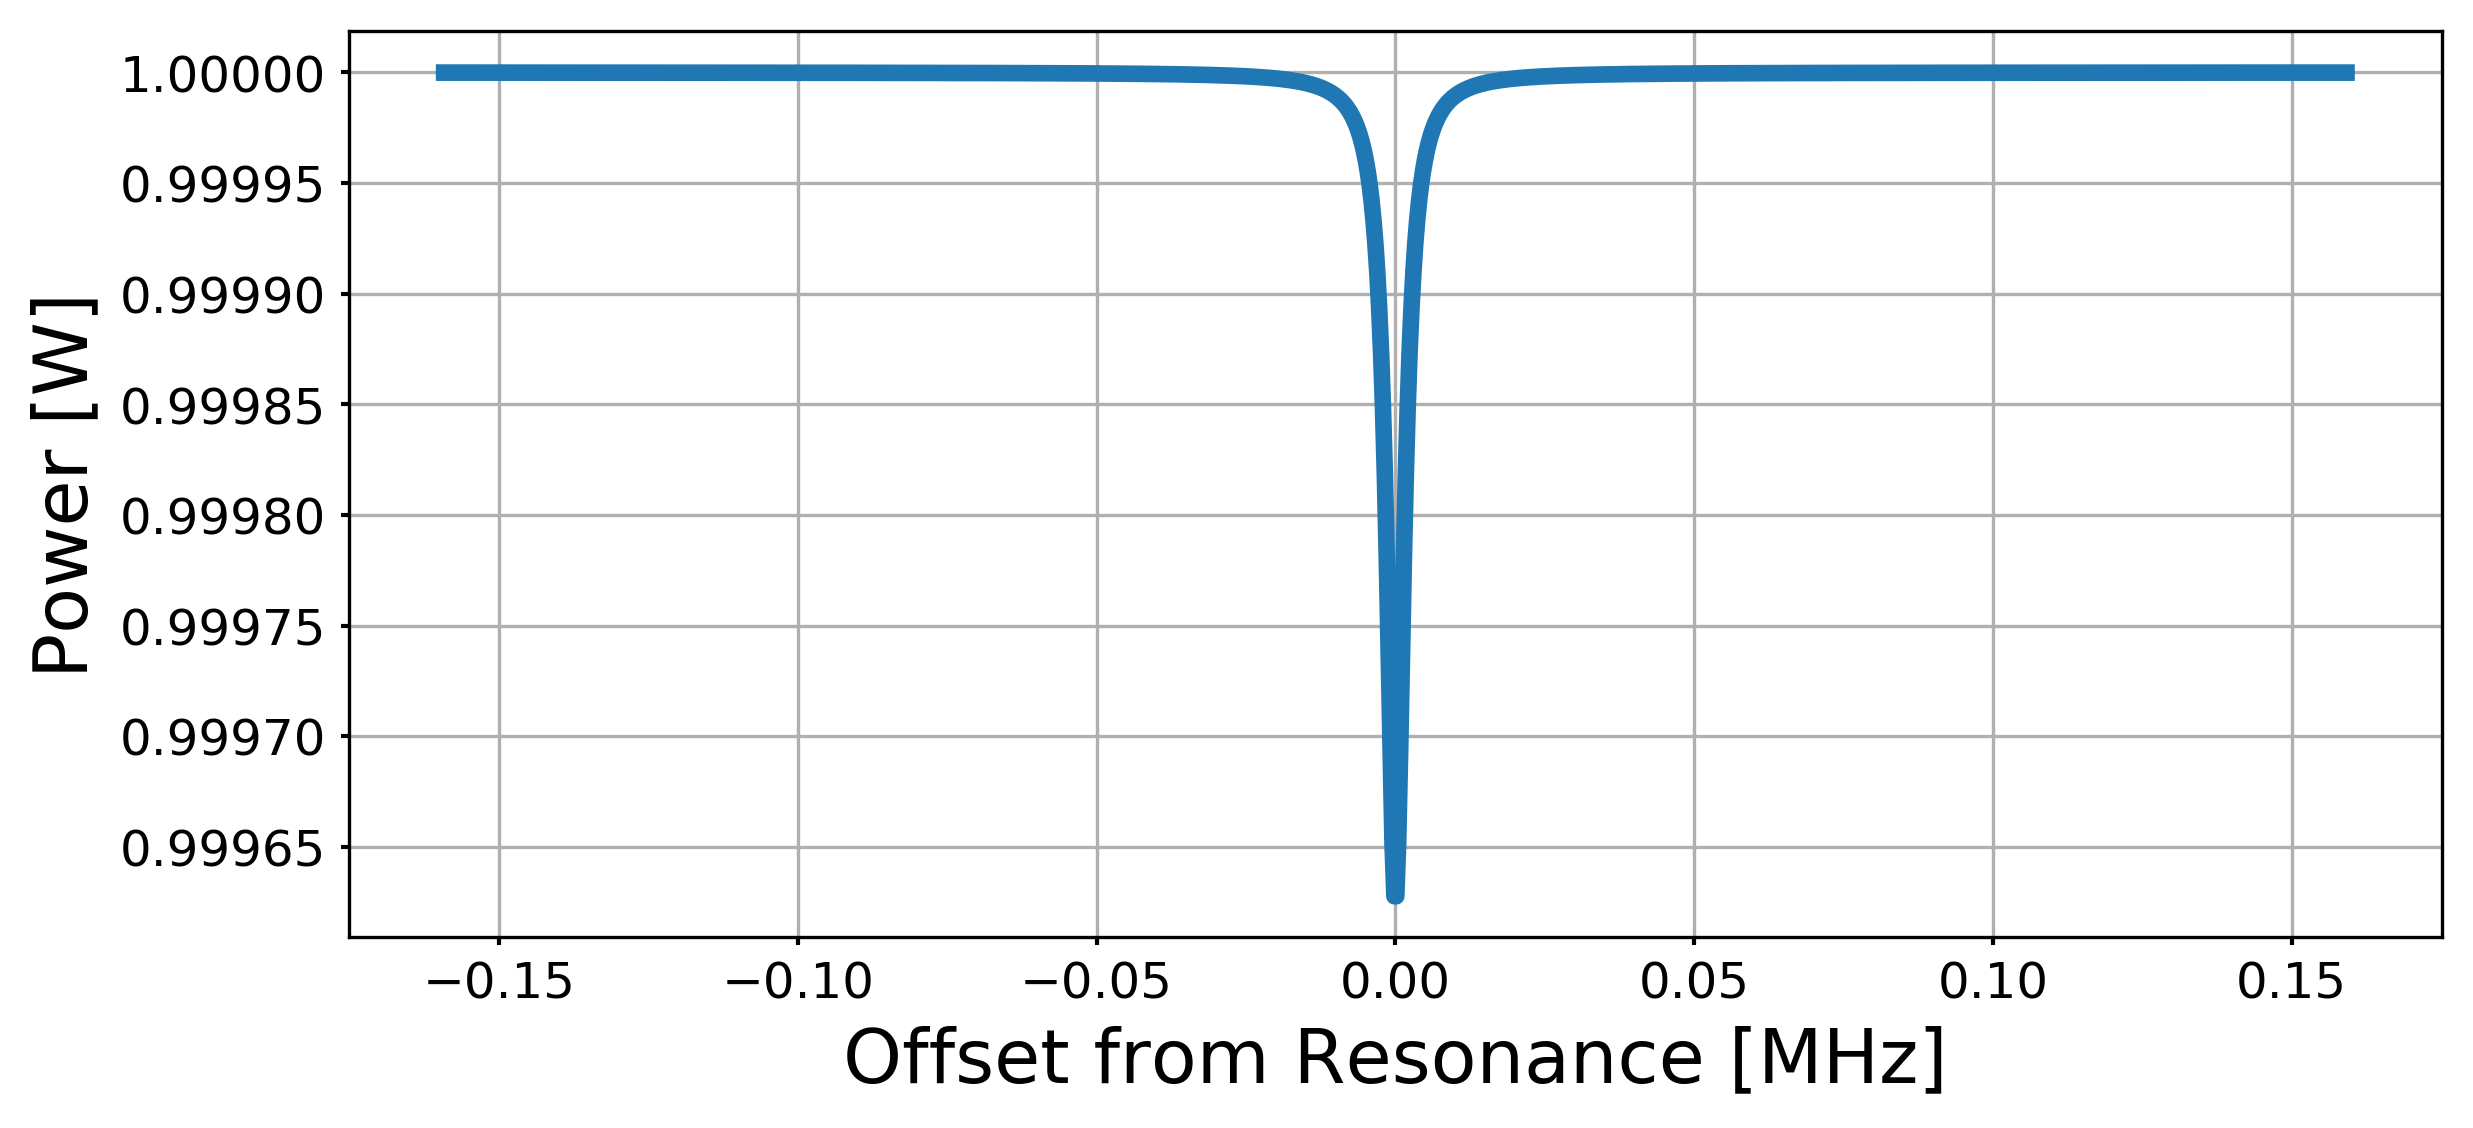

In [16]:
plot_fig_pwr(out['PDrefl'],'Reflected Power','Arm_Refl')

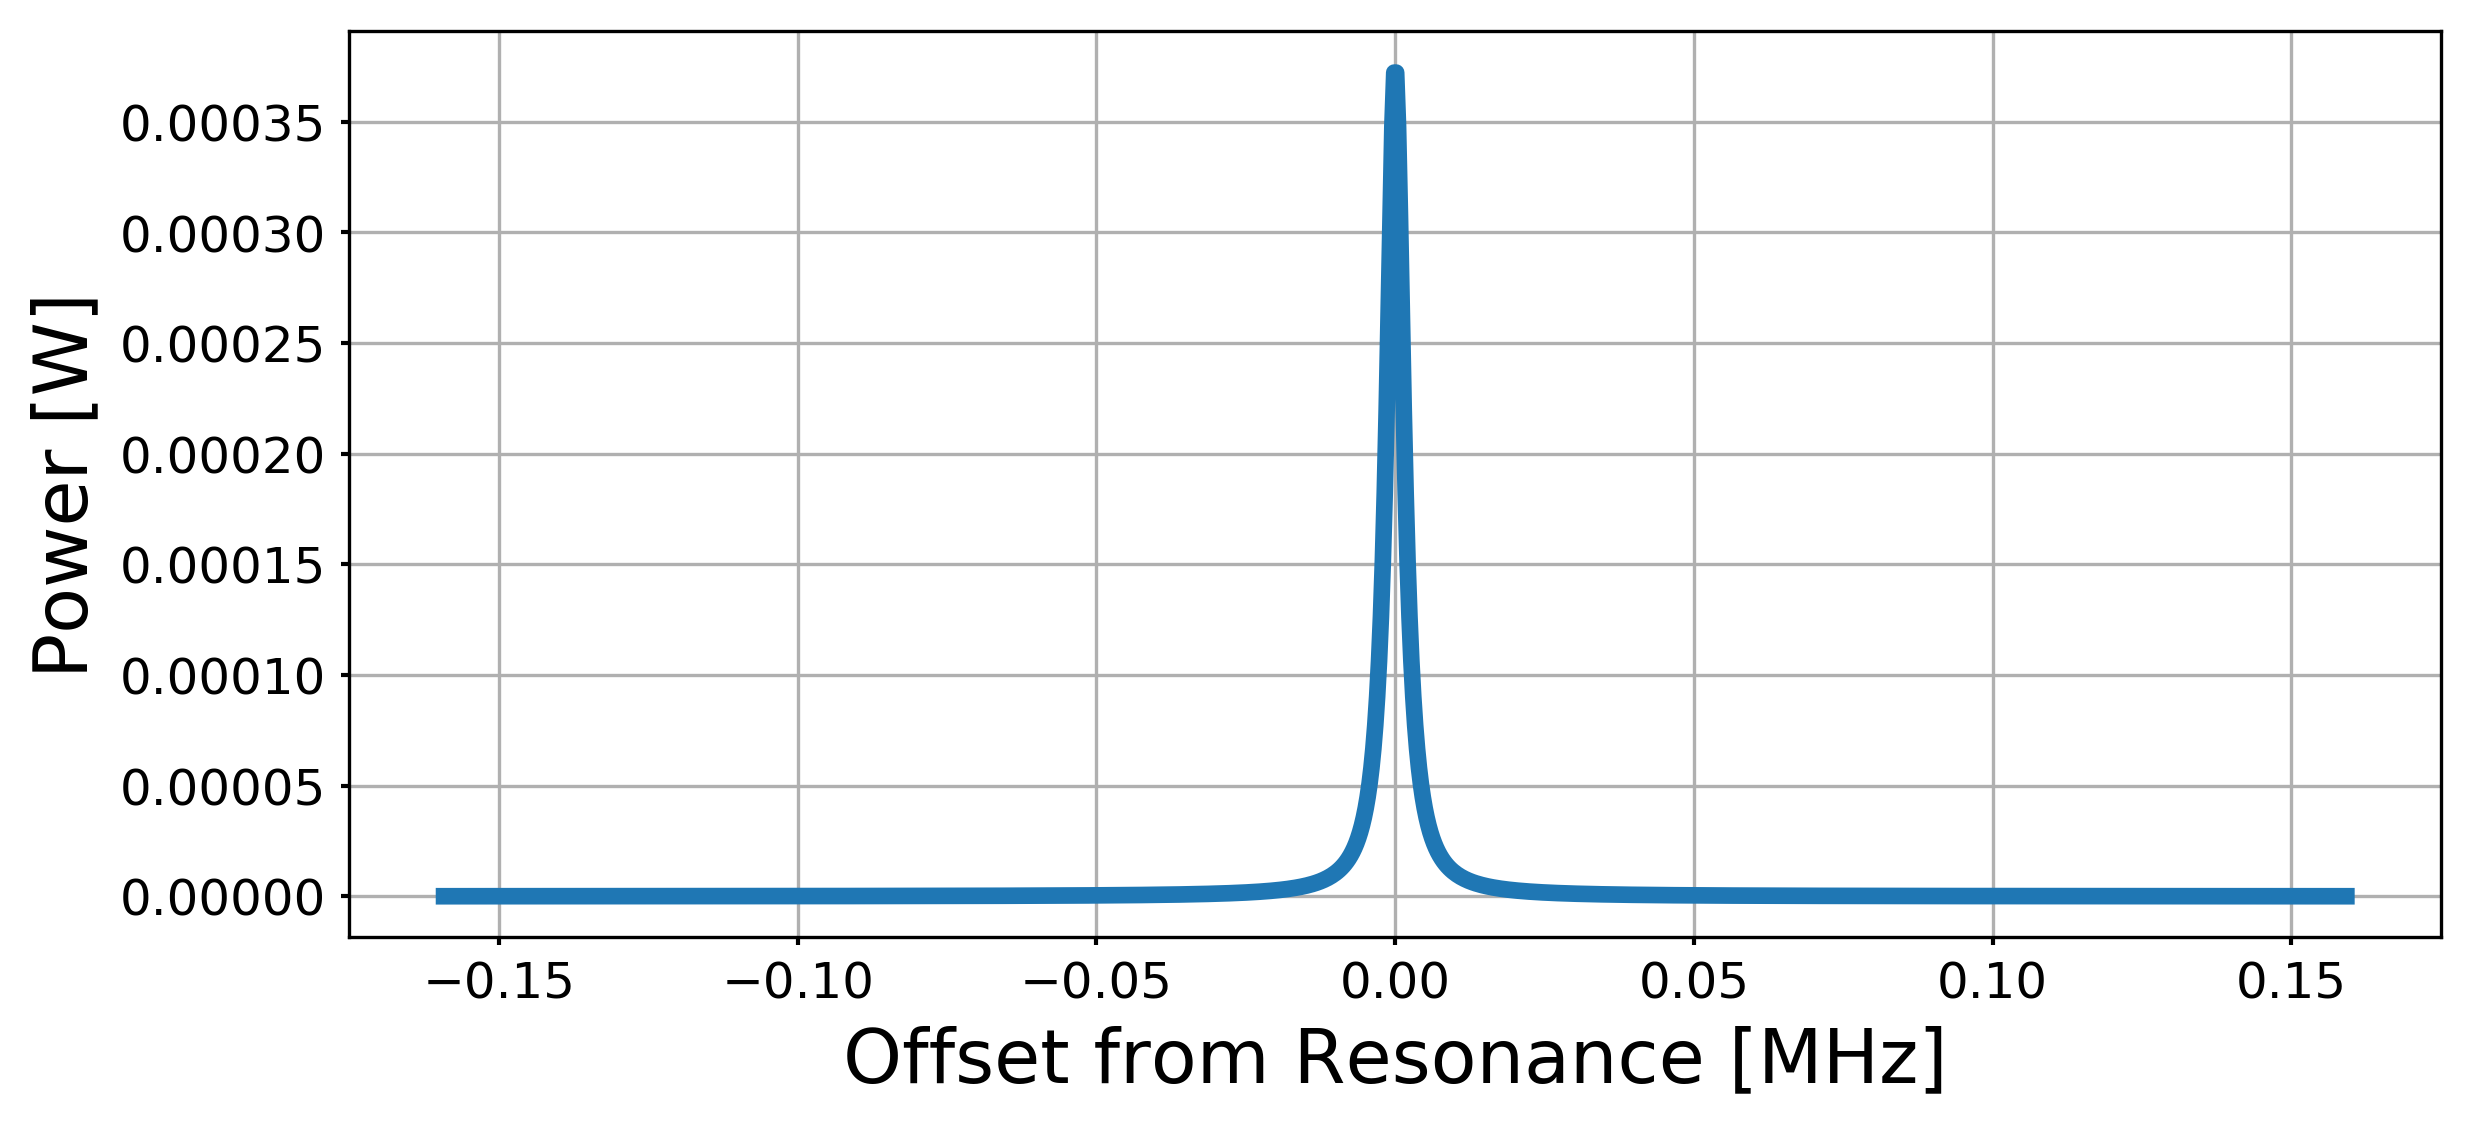

In [17]:
plot_fig_pwr(out['PDtran'],'Transmitted Power','Arm_Tran')

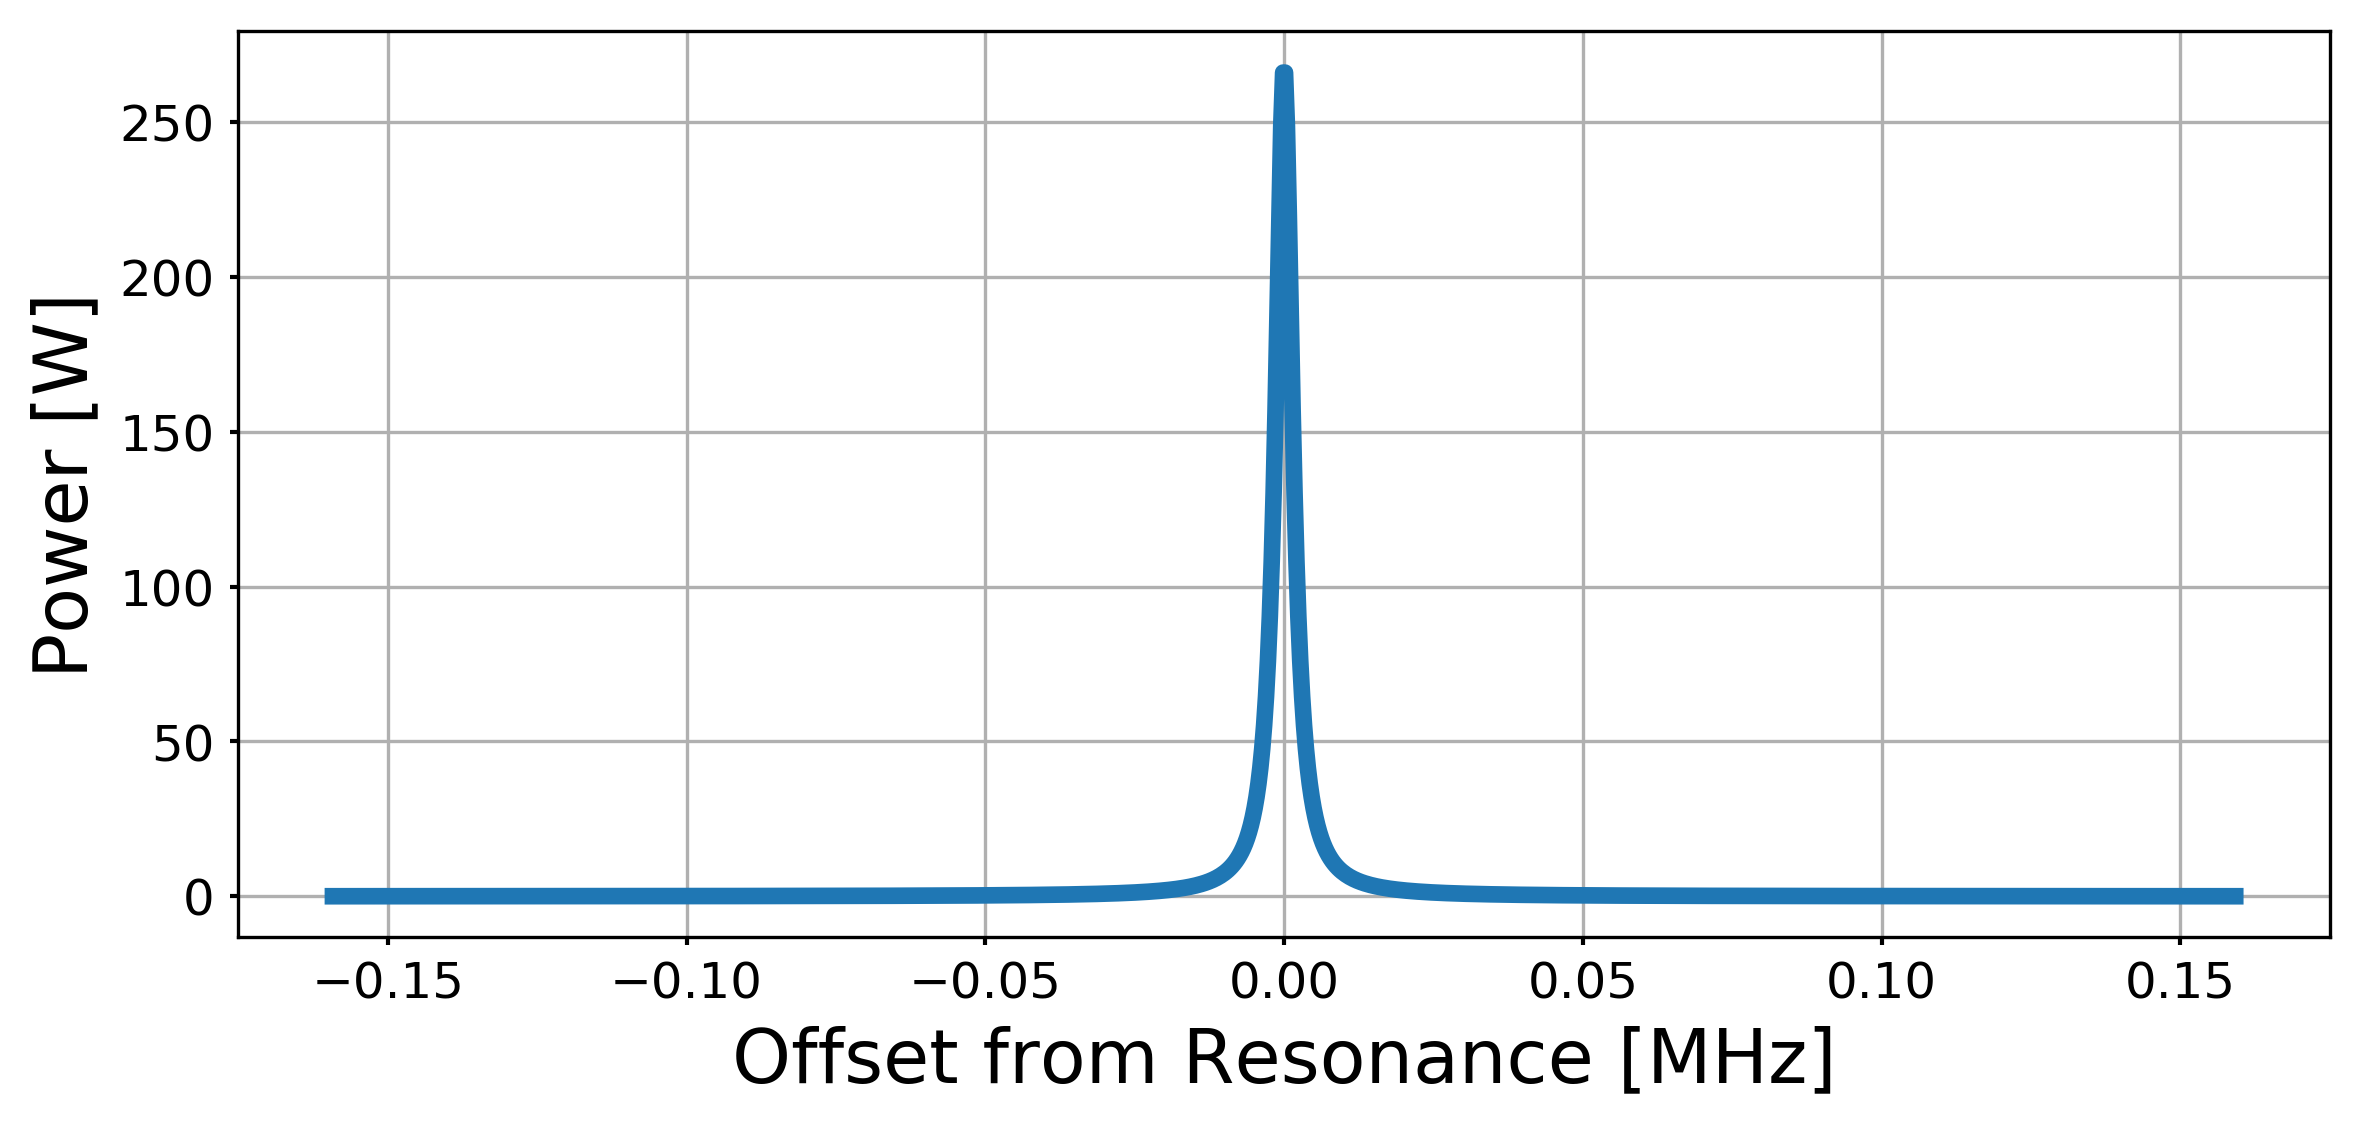

In [18]:
plot_fig_pwr(out['PDcirc'],'Circulating Power','Arm_Circ')

No handles with labels found to put in legend.


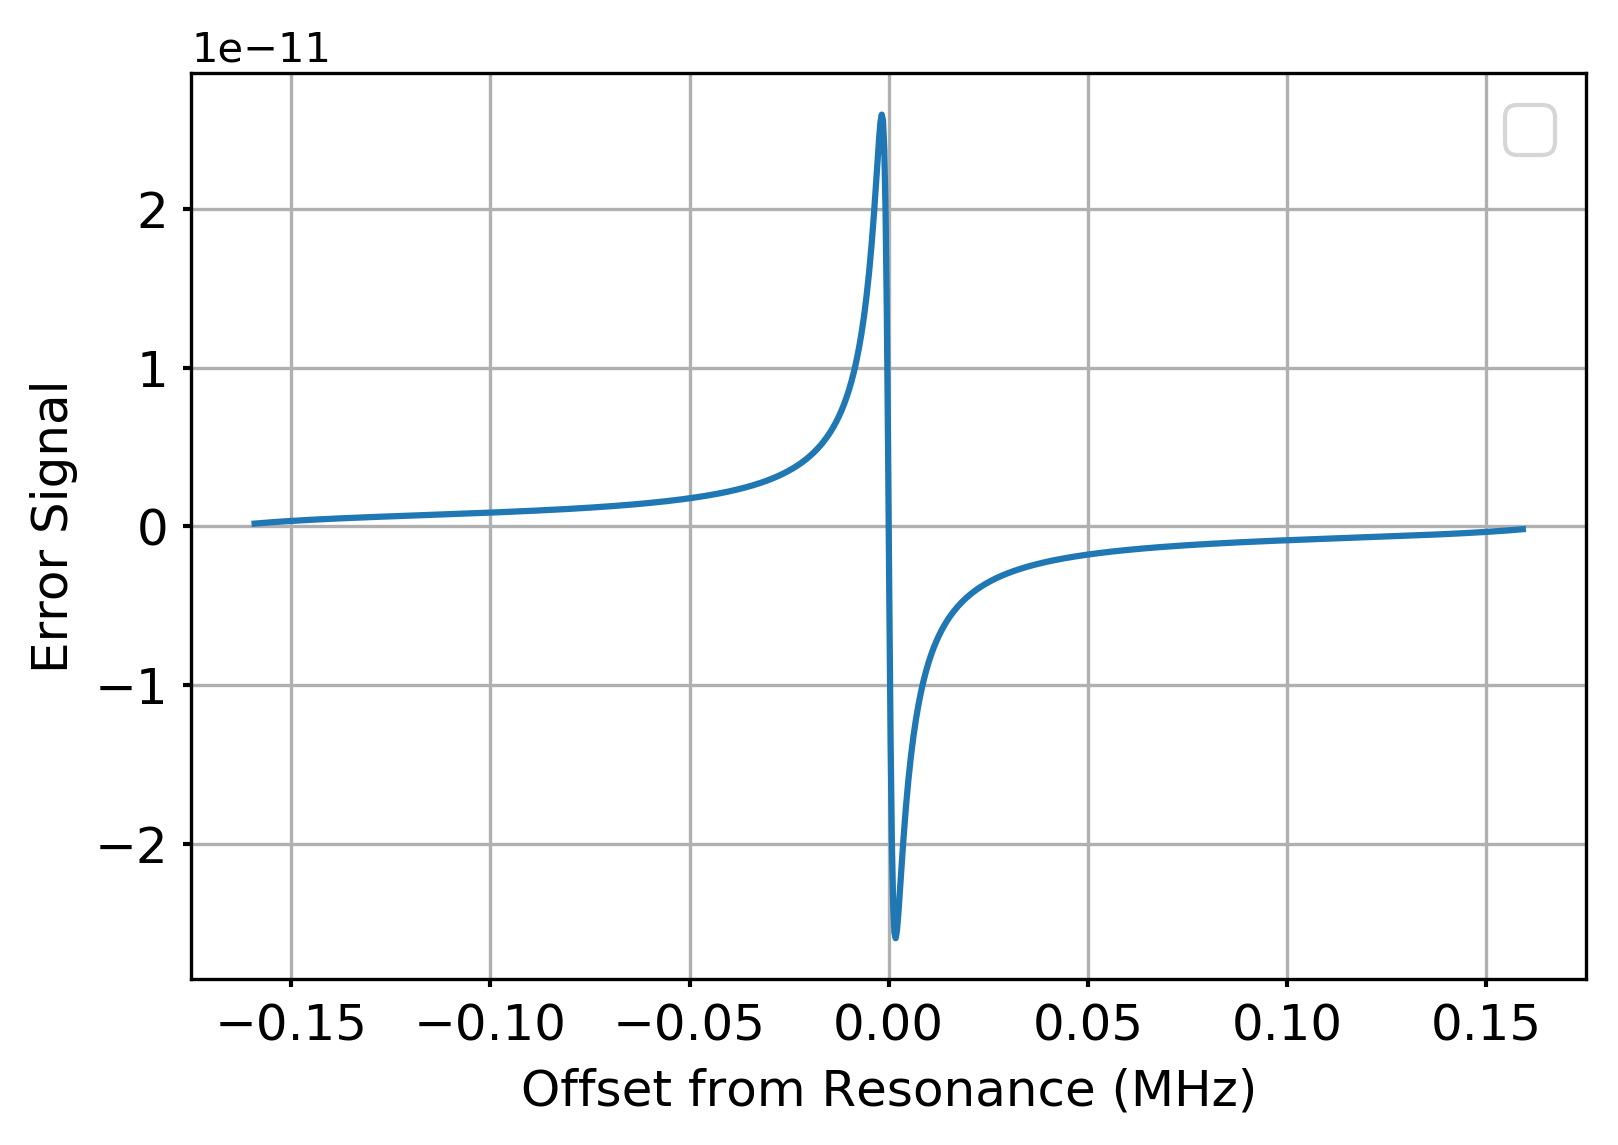

In [19]:
pl.figure(dpi=res)

pl.subplot(111)
#pl.plot(freq, out['PDH'])
pl.plot(freq, out['PDHtran'])
pl.legend(fontsize=15)

pl.xlabel("Offset from Resonance (MHz)",fontsize=12)
pl.ylabel("Error Signal",fontsize=12)

###Main plot formatting
pl.tick_params(labelsize=12)
pl.tick_params(which='both', width=1)
pl.tick_params(which='major', length=2)
pl.tick_params(which='minor', length=2)
pl.grid(True, zorder=-1)

pl.savefig('../../Figures/PDH_Err.png')
#pl.tight_layout()
pl.show()